In [22]:
import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class MovingAverageCrossover:
    def __init__(self, capital, stock, start, end, short_period, long_period):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start
        self.end = end

    def download_data(self):
        stock_data = {}
        ticker = yf.download(self.stock, self.start, self.end)
        stock_data['price'] = ticker['Adj Close']
        self.data = pd.DataFrame(stock_data)

    def simulate(self):
        price_when_buy = 0

        for index, row in self.data.iterrows():
            if row['short_ma'] < row['long_ma'] and self.is_long:
                self.equity.append(self.capital * row.price / price_when_buy)
                self.is_long = False
            elif row['short_ma'] > row['long_ma'] and not self.is_long:
                price_when_buy = row['price']
                self.is_long = True

    def construct_signals(self):
        self.data['short_ma'] = self.data['price'].ewm(span=self.short_period).mean()
        self.data['long_ma'] = self.data['price'].ewm(span=self.long_period).mean()

    def plot_signals(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.price, label='Stock Price')
        plt.plot(self.data.short_ma, label='Short MA', color='blue')
        plt.plot(self.data.long_ma, label='Long MA', color='green')
        plt.title('Moving Average (MA) Crossover Trading Strategy')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

    def plot_equity(self):
        print('Profit of the trading strategy: %.2f%%' % ((float(self.equity[-1]) - float(self.equity[0])) / float(self.equity[0]) * 100))
        print('Actual capital: $%0.2f' % self.equity[-1])
        plt.figure(figsize=(12, 6))
        plt.title('Equity Curve')
        plt.plot(self.equity, label='Stock Price', color='green')
        plt.xlabel('Date')
        plt.ylabel('Actual Capital ($)')
        plt.legend()
        plt.show()

    
    def calculate_metrics(self):
        # Calculate Sharpe Ratio
        sharpe_ratio = np.sqrt(252) * np.mean(self.returns) / np.std(self.returns)
        
        # Calculate Sortino Ratio
        downside_returns = np.where(np.array(self.returns) < 0, np.array(self.returns), 0)
        sortino_ratio = np.sqrt(252) * np.mean(self.returns) / np.std(downside_returns)
        
        # Calculate Max Drawdown
        equity = np.array(self.equity)
        max_drawdown = np.max(np.maximum.accumulate(equity) - equity) / np.max(np.maximum.accumulate(equity))

        return sharpe_ratio, sortino_ratio, max_drawdown

    def optimize_parameters(capital, stock, start_date, end_date):
        best_short_period = None
        best_long_period = None
        best_profit = float('-inf')

        for short_period in range(5, 30): 
            for long_period in range(50, 100):
                strategy = MovingAverageCrossover(capital, stock, start_date, end_date, short_period, long_period)
                strategy.download_data()
                strategy.construct_signals()
                strategy.simulate()
                profit = (strategy.equity[-1] - strategy.equity[0]) / strategy.equity[0] * 100
                if profit > best_profit:
                    best_profit = profit
                    best_short_period = short_period
                    best_long_period = long_period

        print("Optimal parameters: Short Period = {}, Long Period = {}".format(best_short_period, best_long_period))
        print("Best Profit: {:.2f}%".format(best_profit))


if __name__ == '__main__':
    start_date = datetime.datetime(2010, 1, 1)
    end_date = datetime.datetime(2024, 2, 12)
    optimize_parameters(100, 'NVDA', start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Optimal parameters: Short Period = 20, Long Period = 54
Best Profit: 179.49%


[*********************100%%**********************]  1 of 1 completed


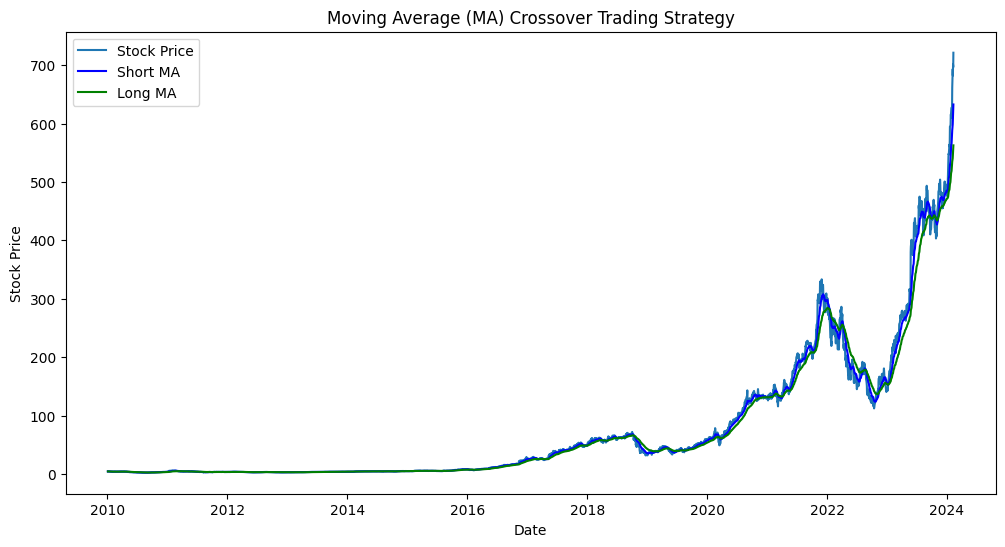

Profit of the trading strategy: 179.49%
Actual capital: $279.49


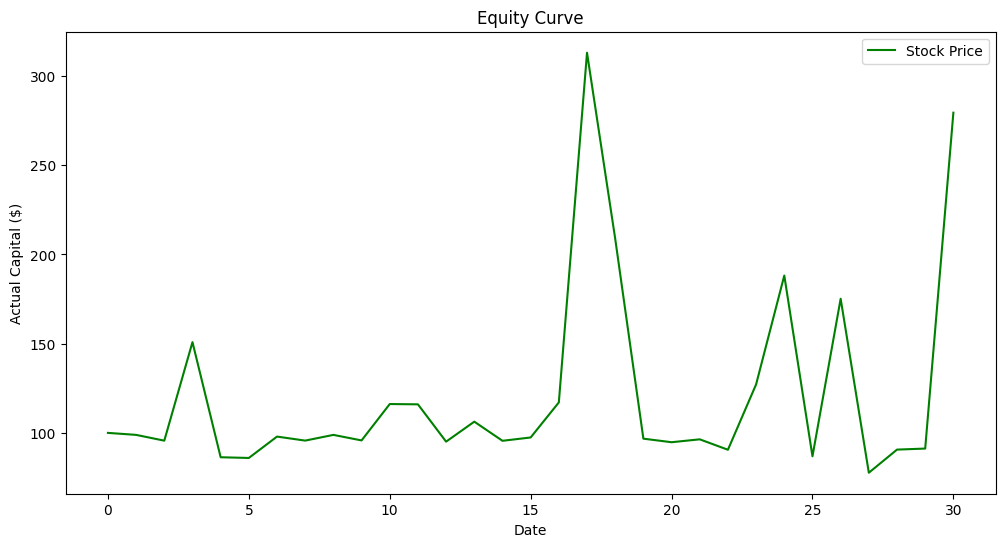

[100, 98.88058758595007, 95.63697232244799, 150.86051232344545, 86.34147830673996, 85.94147342483201, 97.92083695875219, 95.67163896566085, 98.8747490096478, 95.77130345869254, 116.16506404339802, 116.00167785410245, 95.08192671308788, 106.28922067431628, 95.56358205383714, 97.42881285968828, 117.07693758606358, 313.0943471605429, 208.84315121664264, 96.7593186646616, 94.76212240698938, 96.38802459618468, 90.54219280269942, 127.18314988705737, 188.19318459623884, 86.87987918569766, 175.17800737454166, 77.66752793174355, 90.62536153595414, 91.2108043526642, 279.4889417494088]


In [25]:
    strategy = MovingAverageCrossover(100, 'NVDA', start_date, end_date, 20, 54)
    strategy.download_data()
    strategy.construct_signals()
    strategy.plot_signals()
    strategy.simulate() 
    strategy.plot_equity() 
    print(strategy.equity) 